In [23]:
import torch
import torchvision.datasets as dset
# import torchvision.transforms as transforms
import pickle as p
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plimg
from PIL import Image

d_func = dset.CIFAR100
test_set = d_func('data', train=False, download=True)

Files already downloaded and verified


In [20]:
im, l = test_set[13]

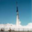

In [21]:
im

In [22]:
l

69

In [24]:

def load_labels_name(filename):
    """使用pickle反序列化labels文件，得到存储内容
        cifar10的label文件为“batches.meta”，cifar100则为“meta”
        反序列化之后得到字典对象，可根据key取出相应内容
    """
    with open(filename, 'rb') as f:
        obj = p.load(f)
    return obj


In [26]:
names_dic = load_labels_name('data/cifar-100-python/meta')

In [28]:
names_dic

{'fine_label_names': ['apple',
  'aquarium_fish',
  'baby',
  'bear',
  'beaver',
  'bed',
  'bee',
  'beetle',
  'bicycle',
  'bottle',
  'bowl',
  'boy',
  'bridge',
  'bus',
  'butterfly',
  'camel',
  'can',
  'castle',
  'caterpillar',
  'cattle',
  'chair',
  'chimpanzee',
  'clock',
  'cloud',
  'cockroach',
  'couch',
  'crab',
  'crocodile',
  'cup',
  'dinosaur',
  'dolphin',
  'elephant',
  'flatfish',
  'forest',
  'fox',
  'girl',
  'hamster',
  'house',
  'kangaroo',
  'keyboard',
  'lamp',
  'lawn_mower',
  'leopard',
  'lion',
  'lizard',
  'lobster',
  'man',
  'maple_tree',
  'motorcycle',
  'mountain',
  'mouse',
  'mushroom',
  'oak_tree',
  'orange',
  'orchid',
  'otter',
  'palm_tree',
  'pear',
  'pickup_truck',
  'pine_tree',
  'plain',
  'plate',
  'poppy',
  'porcupine',
  'possum',
  'rabbit',
  'raccoon',
  'ray',
  'road',
  'rocket',
  'rose',
  'sea',
  'seal',
  'shark',
  'shrew',
  'skunk',
  'skyscraper',
  'snail',
  'snake',
  'spider',
  'squirrel

In [16]:

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb')as f:
        datadict = p.load(f, encoding='bytes')
        #X = datadict[b'data']
        #Y = datadict[b'labels']
        #X = X.reshape(10000, 3, 32, 32)
        X = datadict[b'data']
        Y = datadict[b'coarse_labels']+datadict[b'fine_labels']
        X = X.reshape(-1, 3, 32, 32)
        Y = np.array(Y)
        return X, Y
 
 
if __name__ == "__main__":
    #imgX, imgY = load_CIFAR_batch("./cifar-10-batches-py/data_batch_1")
    imgX, imgY = load_CIFAR_batch("data/cifar-100-python/test")
    print(imgX.shape)
    print("正在保存图片:")
    for i in range(imgX.shape[0]):
        imgs = imgX[i]
        if i < 10:#只循环100张图片,这句注释掉可以便利出所有的图片,图片较多,可能要一定的时间
            img0 = imgs[0]
            img1 = imgs[1]
            img2 = imgs[2]
            i0 = Image.fromarray(img0)
            i1 = Image.fromarray(img1)
            i2 = Image.fromarray(img2)
            img = Image.merge("RGB",(i0,i1,i2))
            name = "img" + str(i)+".png"
            img.save("data/extract-pic1/"+name,"png")#文件夹下是RGB融合后的图像
            for j in range(imgs.shape[0]):
                img = imgs[j]
                name = "img" + str(i) + str(j) + ".jpg"
                print("正在保存图片" + name)
                plimg.imsave("data/extract-pic2/" + name, img)#文件夹下是RGB分离的图像
    print("保存完毕.")

(10000, 3, 32, 32)
正在保存图片:
正在保存图片img00.jpg
正在保存图片img01.jpg
正在保存图片img02.jpg
正在保存图片img10.jpg
正在保存图片img11.jpg
正在保存图片img12.jpg
正在保存图片img20.jpg
正在保存图片img21.jpg
正在保存图片img22.jpg
正在保存图片img30.jpg
正在保存图片img31.jpg
正在保存图片img32.jpg
正在保存图片img40.jpg
正在保存图片img41.jpg
正在保存图片img42.jpg
正在保存图片img50.jpg
正在保存图片img51.jpg
正在保存图片img52.jpg
正在保存图片img60.jpg
正在保存图片img61.jpg
正在保存图片img62.jpg
正在保存图片img70.jpg
正在保存图片img71.jpg
正在保存图片img72.jpg
正在保存图片img80.jpg
正在保存图片img81.jpg
正在保存图片img82.jpg
正在保存图片img90.jpg
正在保存图片img91.jpg
正在保存图片img92.jpg
保存完毕.


In [3]:
from PIL import Image

# 打开原始图片
original_image = Image.open("camel.png")

# 将图片调整为 32x32 像素大小
resized_image = original_image.resize((32, 32))

# # 保存缩小后的图片
resized_image.save("resized_image.png")


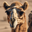

In [2]:
resized_image

In [7]:
import torch
from models.resnet import createModel
from train import Trainer

checkpoint = torch.load('save/cifar100-resnet-56/model_best.pth.tar')

In [9]:
model = createModel(depth=56, data='cifar100', num_classes=100)
model = torch.nn.DataParallel(model).cuda()

model.load_state_dict(checkpoint['state_dict'])


Create ResNet-56 for cifar100


<All keys matched successfully>

In [29]:
import torchvision.transforms as transforms
from PIL import Image


def getTestData(image_file, normalized=True):
    
    original_image = Image.open(image_file)

    # 将图片调整为 32x32 像素大小
    resized_image = original_image.resize((32, 32))
    
    normalize = transforms.Normalize(mean=[0.5071, 0.4867, 0.4408],
                                        std=[0.2675, 0.2565, 0.2761])
        
    common_trans = [transforms.ToTensor()]
    if normalized:
        common_trans.append(normalize)
        test_compose = transforms.Compose(common_trans)

    input_im = test_compose(resized_image)
    
    return input_im.unsqueeze(0)


def test(test_data, model, topk=5):
        model.eval()
        with torch.no_grad():
            test_data = test_data.cuda()
            outputs = model(test_data)
            _, pred = outputs.topk(topk, 1, True, True)
            pred = pred.t()
        return pred.squeeze()

In [20]:
input = getTestData('camel.png')

In [21]:
input.size()

torch.Size([1, 3, 32, 32])

In [25]:
model.eval()
with torch.no_grad():
    input = input.cuda()
    # targets = targets.cuda()
    outputs = model(input)
    _, pred = outputs.topk(5, 1, True, True)
    pred = pred.t()

In [28]:
pred.squeeze().size()

torch.Size([5])